In [10]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [11]:
kpi = pd.read_excel('siste_rente_kpi.xlsx')

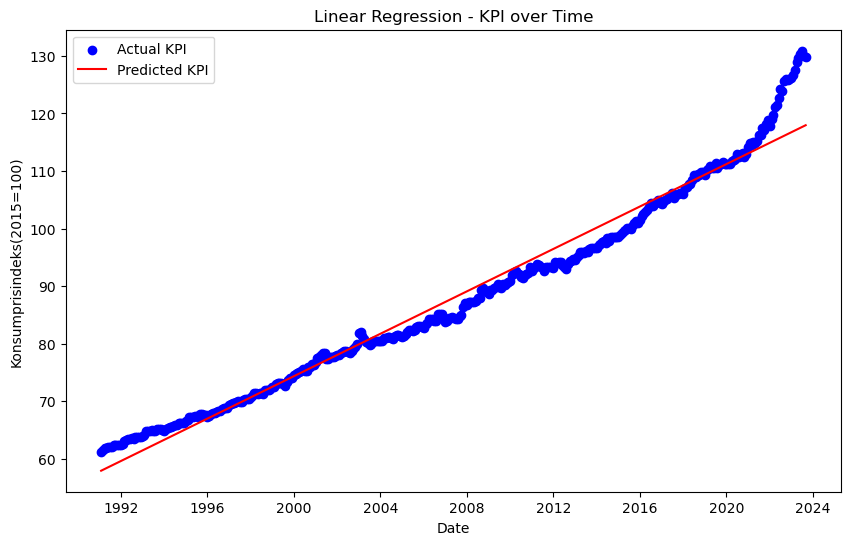

In [12]:
# Convert 'Dato' to datetime object
kpi['Dato'] = pd.to_datetime(kpi['Dato'])

kpi['Dato_numeric'] = (kpi['Dato'] - kpi['Dato'].min()).dt.days

X_kpi = kpi[['Dato_numeric']]
y_kpi = kpi['Konsumprisindeks(2015=100)']

model_kpi_r = LinearRegression()
model_kpi_r.fit(X_kpi, y_kpi)

predictions_kpi = model_kpi_r.predict(X_kpi)

# Extract the first Y value and corresponding date
start_date = kpi['Dato'].min()
start_y_value = y_kpi.iloc[0]

# Calculate the slope for a 2.5% yearly increase
slope =  0.025  # 2.5% as a decimal

# Calculate the intercept based on the start point
intercept = start_y_value - slope * (kpi['Dato'] - start_date).dt.days.iloc[0]

plt.figure(figsize=(10, 6))

# Plotting the data
plt.scatter(kpi['Dato'], y_kpi, color='blue', label='Actual KPI')

# Plotting the regression line
plt.plot(kpi['Dato'], predictions_kpi, color='red', label='Predicted KPI')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Konsumprisindeks(2015=100)')
plt.title('Linear Regression - KPI over Time')
plt.legend()
plt.show()

In [13]:
def model(y, t, k, T, damping):
    I, inflation = y
    dI_dt = k * (inflation - T)
    dinflation_dt = -k * (I - T) - damping * (inflation - T)
    return [np.clip(dI_dt, -0.05, 0.10), np.clip(dinflation_dt, -0.05, 0.10)]

In [14]:
initial_rente = 0.0425
initial_inflasjon = 0.06
mal_inflasjon = 0.02
k = 0.1
damping = 0.1

# Tidsenheter
t = np.linspace(0, 12*25, 10000)

In [15]:
resultat = odeint(model, [initial_rente, initial_inflasjon], t, args=(k, mal_inflasjon, damping))

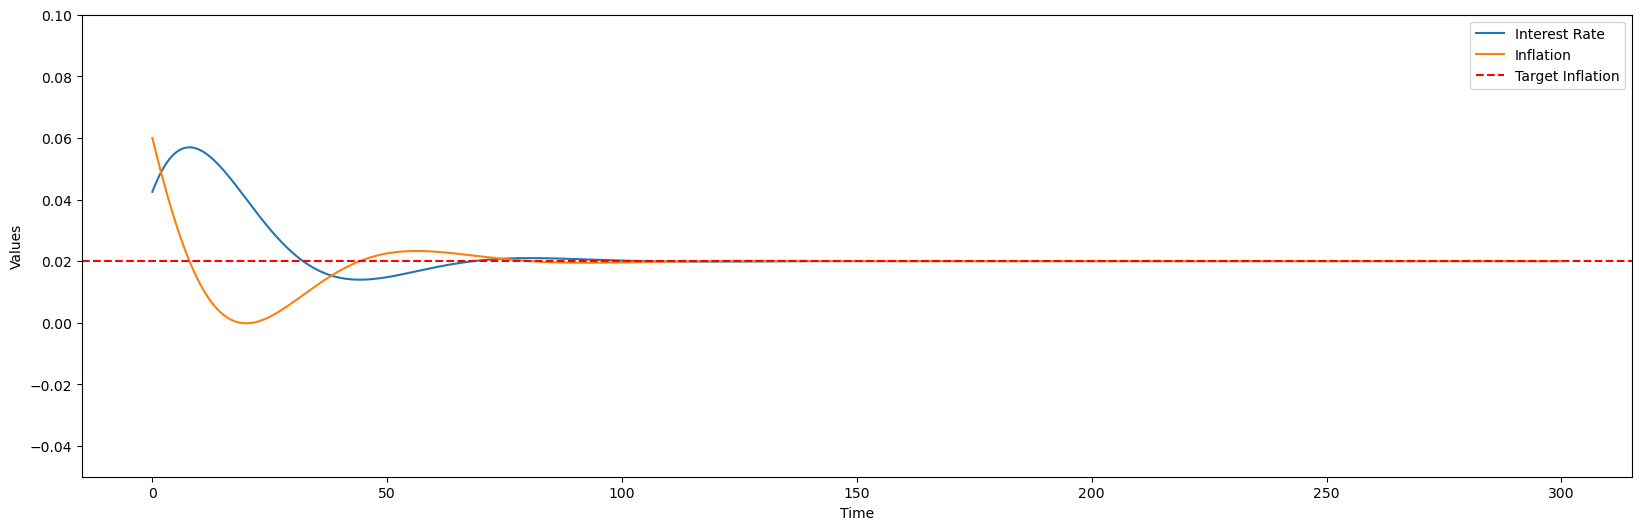

In [16]:
# Increase the size of the plot
plt.figure(figsize=(20, 6))

# Plot the results
plt.plot(t, resultat[:, 0], label='Interest Rate')
plt.plot(t, resultat[:, 1], label='Inflation')
plt.axhline(y=mal_inflasjon, color='r', linestyle='--', label='Target Inflation')
plt.xlabel('Time')
plt.ylabel('Values')
plt.ylim([-0.05, 0.10])  # Set y-axis limits
plt.legend()
plt.show()

In [20]:
for i, (rente, inflasjon) in enumerate(resultat):
    print(f"Time: {t[i]}, Rente: {rente}, Inflasjon: {inflasjon}")

Time: 0.0, Rente: 0.0425, Inflasjon: 0.06
Time: 0.030003000300030003, Rente: 0.04261973088097078, Inflasjon: 0.059812582847097666
Time: 0.060006000600060005, Rente: 0.04273889974825645, Inflasjon: 0.05962536929035505
Time: 0.09000900090009001, Rente: 0.04285750719098097, Inflasjon: 0.05943836036257206
Time: 0.12001200120012001, Rente: 0.04297555389541104, Inflasjon: 0.059251557245615434
Time: 0.15001500150015, Rente: 0.043093040264507027, Inflasjon: 0.059064960513774585
Time: 0.18001800180018002, Rente: 0.04320996700332729, Inflasjon: 0.05887857133006137
Time: 0.21002100210021002, Rente: 0.043326334767235734, Inflasjon: 0.05869239080472962
Time: 0.24002400240024002, Rente: 0.04344214421159624, Inflasjon: 0.058506420048033136
Time: 0.27002700270027, Rente: 0.04355739599177272, Inflasjon: 0.05832066017022574
Time: 0.3000300030003, Rente: 0.04367209076312904, Inflasjon: 0.05813511228156124
Time: 0.33003300330033003, Rente: 0.043786229181029104, Inflasjon: 0.05794977749229347
Time: 0.36003